# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results,on="Mouse ID") 

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].nunique()
mice

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data[['Mouse ID','Timepoint']].duplicated() == True]
duplicate_mice[["Mouse ID", "Timepoint"]]


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data.loc[combined_data['Mouse ID'] != 'g989']
#unique_mice_ids = clean_df['Mouse ID'].nunique()
#unique_mice_ids
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
mice_data = clean_df["Mouse ID"].nunique()
mice_data

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = summary_statistics.mean()
median = summary_statistics.median()
variance = summary_statistics.var()
standard_deviation = summary_statistics.std()
sem = summary_statistics.sem()

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Median Tumor Volume": variance,
    "Tumor Volume Std. Dev.": standard_deviation,
    "Tumor Volume Std. Err.": sem

})

summary_statistics_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
    
})
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

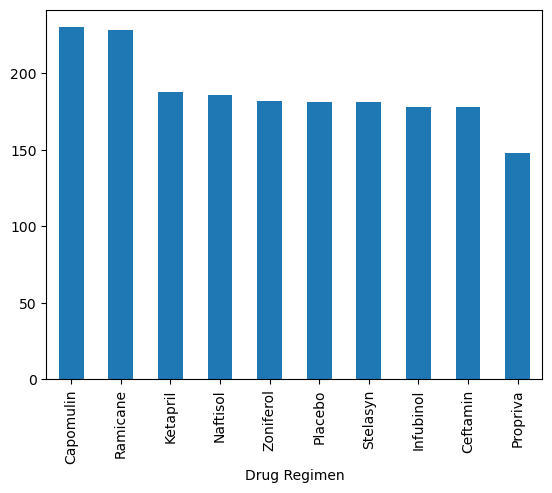

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df['Drug Regimen'].value_counts().plot.bar()
plt.show()

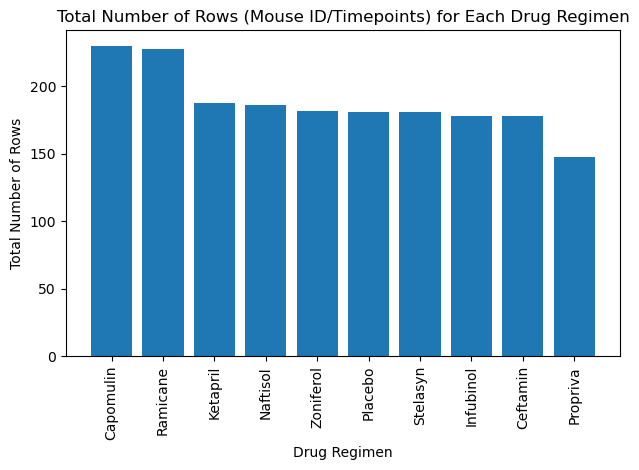

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows for each drug regimen
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

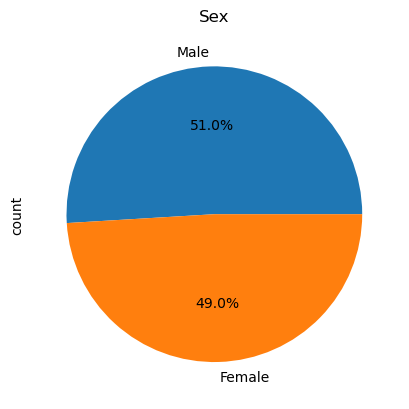

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = clean_df['Sex'].value_counts()
male_female.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex')
plt.show()

In [36]:
#Number of males 

male_count= clean_df['Sex'].value_counts()['Male']

print(male_count)

958


In [37]:
#Number of females

female_count= clean_df['Sex'].value_counts()['Female']

print(female_count)

922


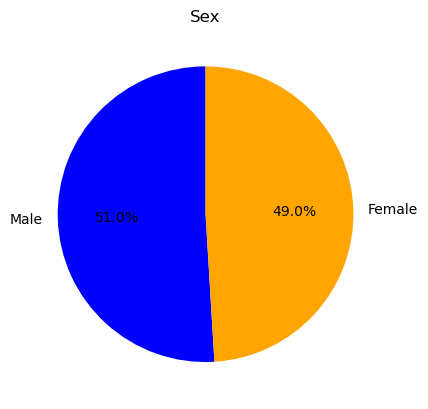

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#I have just done it for pyplot
labels = ["Male", "Female"]
numbers = [958 , 922]
colors = ["blue", "orange"]
plt.title('Sex')
plt.pie(numbers, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(selected_treatments)]
#filtered_df
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
#max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='inner')
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)
    
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f" {drug}'s potential outliers: {outliers}.")

 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
 Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64.
 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


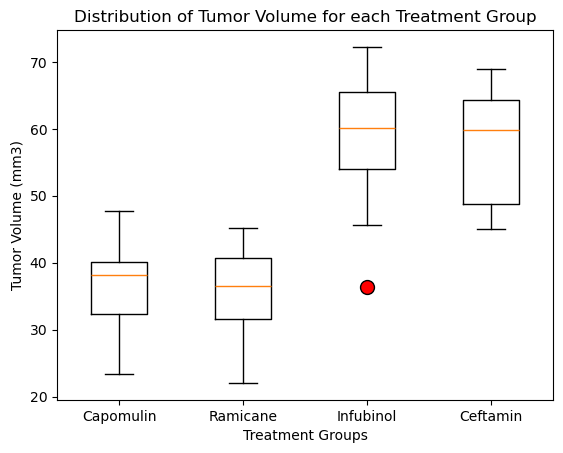

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([merged_df[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatments],
            labels=treatments, flierprops=dict(markerfacecolor='red', markersize=10))

plt.xlabel('Treatment Groups')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for each Treatment Group')
plt.show()

## Line and Scatter Plots

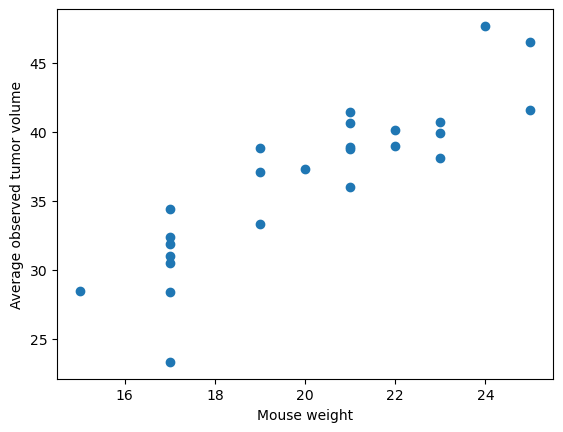

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only Capomulin data
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Plot the scatter plot for Capomulin data
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse weight')
plt.ylabel('Average observed tumor volume')
plt.show()

## Correlation and Regression

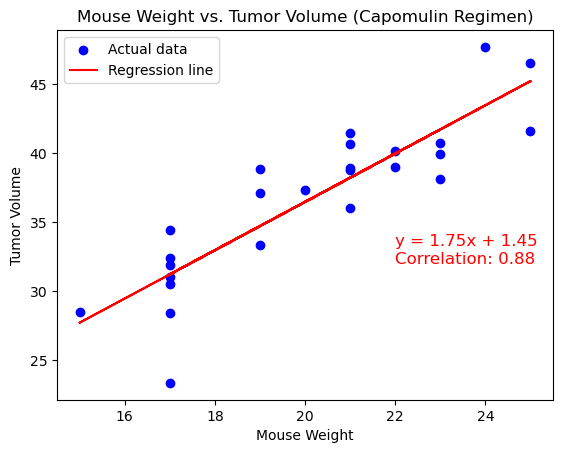

Correlation Coefficient: 0.8767060403658118
Regression Line: Tumor Volume = 1.75 * Mouse Weight + 1.45
The correlation between mouse weight and the average tumor volume is 0.88


In [83]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_df['Weight (g)'].corr(capomulin_df['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
predicted_tumor_volume = slope * capomulin_df['Weight (g)'] + intercept
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'], color='blue', label='Actual data')
plt.plot(capomulin_df['Weight (g)'], predicted_tumor_volume, color='red', label='Regression line')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Mouse Weight vs. Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nCorrelation: {correlation:.2f}', (22, 32), fontsize=12, color='red')
plt.show()

print(f'Correlation Coefficient: {correlation}')
print(f'Regression Line: Tumor Volume = {slope:.2f} * Mouse Weight + {intercept:.2f}')
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")



ANALYSIS: 

We undertook a comprehensive study involving 249 mice, with 49% being female and 51% male. Our aim was to explore various treatments for Squamous Cell Carcinoma (SCC), commonly known as skin cancer, with a particular focus on comparing the efficacy of Capomulin against other drug regimens. Through rigorous analysis, we arrived at several key insights:
-
Examination of the bar charts revealed that Capomulin and Ramicane were the predominant treatments administered during the stud
y-.
Further scrutiny, particularly through box plot analysis, indicated that both Capomulin and Ramicane exhibited notable effectiveness. Approximately 50% of tumors treated with these drugs displayed volumes ranging from 30mm³ to 40mm³. Ramicane demonstrated a slightly superior efficacy compared to Capomul
i-n.
The scatter plot analysis unveiled a significant correlation between the weight of the mice and the observed tumor volume. Notably, larger mice tended to exhibit larger tumor volumes. For instance, tumors exceeding 50mm³ were predominantly observed in mice weighing approximately 
2-4g.
Correlation and Regression analyses confirmed a strong positive correlation between mouse weight and average tumor volume, with a correlation coefficient of 0.88. The regression line further illustrated that for every one-unit increase in mouse weight, the tumor volume is expected to increase by 
1.75.
In conclusion, our findings suggest that Capomulin outperforms other treatments, with only Ramicane showing comparable eff.





